<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Abschnitt_5_Convolutional_Neural_Networks/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we´re working with are from the Food101 dataset - https://www.kaggle.com/kmader/food41

However we´ve modified it to only use two   classes (pizza & steak) using the image data modification notebook.


In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-07-15 17:08:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   151MB/s    in 0.7s    

2021-07-15 17:08:23 (151 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for computer vision project.. this usually means visualizing many samples of your data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

#Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"Ther are {len (dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Ther are 2 directories and 1 images in 'pizza_steak'.
Ther are 2 directories and 1 images in 'pizza_steak/test'.
Ther are 0 directories and 250 images in 'pizza_steak/test/steak'.
Ther are 0 directories and 250 images in 'pizza_steak/test/pizza'.
Ther are 2 directories and 1 images in 'pizza_steak/train'.
Ther are 0 directories and 750 images in 'pizza_steak/train/steak'.
Ther are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
#The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jul 15 17:08 .
drwxr-xr-x 1 root root 4096 Jul 15 17:08 ..
-rw-r--r-- 1 root root 6148 Jul 15 17:08 .DS_Store
drwxr-xr-x 4 root root 4096 Jul 15 17:08 test
drwxr-xr-x 4 root root 4096 Jul 15 17:08 train


In [7]:
#Another way to get out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

Tp visualize our imahes, first let´s get the class names programmatically.

In [8]:
#Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [9]:
#Let´s visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup target directory
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  #show the shape of the image
  print(f"image shape: {img.shape}")

  return img

image shape: (512, 341, 3)


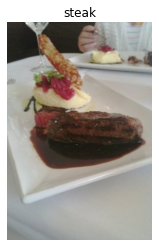

In [10]:
#View a random image from the training dataset
img = view_random_image("pizza_steak/train/", "steak")

image shape: (512, 384, 3)


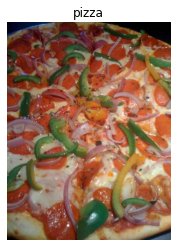

In [11]:
img = view_random_image("pizza_steak/train/", "pizza")

In [12]:
import tensorflow as tf
#tf.constant(img)

In [13]:
#View the image shape
img.shape #return width, height, colour channels

(512, 384, 3)

In [14]:
#Get all the pixel values between 0 & 1
img / 225.

array([[[0.01333333, 0.        , 0.08444444],
        [0.02666667, 0.01333333, 0.08888889],
        [0.02222222, 0.00888889, 0.08444444],
        ...,
        [0.00444444, 0.00444444, 0.00444444],
        [0.00444444, 0.00444444, 0.00444444],
        [0.00444444, 0.00444444, 0.00444444]],

       [[0.01777778, 0.00444444, 0.08888889],
        [0.02666667, 0.01333333, 0.08888889],
        [0.02222222, 0.00888889, 0.08444444],
        ...,
        [0.00444444, 0.00444444, 0.00444444],
        [0.00444444, 0.00444444, 0.00444444],
        [0.00444444, 0.00444444, 0.00444444]],

       [[0.01777778, 0.00444444, 0.08888889],
        [0.02222222, 0.00888889, 0.08444444],
        [0.02222222, 0.00888889, 0.08444444],
        ...,
        [0.00444444, 0.00444444, 0.00444444],
        [0.00444444, 0.00444444, 0.00444444],
        [0.00444444, 0.00444444, 0.00444444]],

       ...,

       [[0.00444444, 0.        , 0.        ],
        [0.00444444, 0.        , 0.00888889],
        [0.00444444, 0

## An end-to-end example 

Let´s build a convolutional neural network to find patterns in our images, more specifically we nd a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit training data to our CNN

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set random seed
tf.random.set_seed(42)

#Preprocess Data (get all of the pixel values between 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Set up path to out directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode="binary", seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), class_mode="binary", seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
#Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters=10,
                                                      kernel_size=3,
                                                      activation="relu",
                                                      input_shape=(224,224,3)),
                               tf.keras.layers.Conv2D(10, 3, activation="relu"),
                               tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
                               tf.keras.layers.Conv2D(10, 3, activation="relu"),
                               tf.keras.layers.Conv2D(10, 3, activation="relu"),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1, activation="sigmoid") 
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [17]:
#Compile the model
model_1.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [18]:
#Fit the model
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 42s 203ms/step - loss: 0.5427 - accuracy: 0.7180 - val_loss: 0.3818 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4236 - accuracy: 0.8027 - val_loss: 0.3381 - val_accuracy: 0.8740
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3731 - accuracy: 0.8340 - val_loss: 0.3029 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3618 - accuracy: 0.8340 - val_loss: 0.3346 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3219 - accuracy: 0.8687 - val_loss: 0.3455 - val_accuracy: 0.8420


In [19]:
!nvidia-smi

Thu Jul 15 17:09:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    34W /  70W |   2270MiB / 15109MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [20]:
#Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

#Using the same model as before

Let´s replicate the model we´ve build in a previous section to see if it works with our image data

In [21]:
#Set random seed
tf.random.set_seed(42)

#Build our model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])
#Compile the model
model_2.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 178ms/step - loss: 0.6960 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.4760 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.4733 - val_loss: 0.6931 - val_accuracy: 0.5000


In [22]:
# Get a summary of model 2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Set the random seed
tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_3.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

#Fit the model
history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 180ms/step - loss: 2.7705 - accuracy: 0.6060 - val_loss: 1.1239 - val_accuracy: 0.6300
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.8546 - accuracy: 0.6893 - val_loss: 0.9246 - val_accuracy: 0.6900
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6599 - accuracy: 0.7533 - val_loss: 0.4291 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.5038 - accuracy: 0.7913 - val_loss: 0.4501 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4441 - accuracy: 0.8047 - val_loss: 0.5427 - val_accuracy: 0.7520


In [24]:
#Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let´s break it down

1. Become one with the data
2. Proprocess the data (scaling, normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model 
7. Repeat until satisfied

image shape: (512, 512, 3)
image shape: (384, 512, 3)


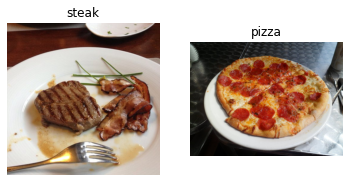

In [25]:
#Visualize data
plt.figure
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [26]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches.

A batch is a small subset of data. Rather than look at all 10.000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10.000 images might not fit into the memory of your Processor (GPU)
2. Trying to learn the pattern in 10.000 images in one hit could result in the model not beaing able to leran very well.

Why 32?

Because 32 is good for your health

In [27]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [28]:
#Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224,224), class_mode="binary", batch_size=32, seed=42)
test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224,224), class_mode="binary", batch_size=32, seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
#Get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [30]:
#How many batches are there
len(train_data)

47

In [31]:
#Get the first two images
images[:2], print(images[0].shape)

(224, 224, 3)


(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [32]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

In [33]:
labels.shape

(32,)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment, you try to beat the baseline.

In deep learning, there is almost an infinite amoount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field of your problem)

In [34]:
#Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [35]:
#Create the model (this will be our baseline, a layer convolutional network)
model_4 = Sequential([
                      Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224,224,3)),
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

In [36]:
#Compile the model 
model_4.compile(loss="binary_crossentropy", metrics="accuracy", optimizer="Adam")

In [37]:
#Fit the model 
history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 200ms/step - loss: 0.7458 - accuracy: 0.7273 - val_loss: 0.3949 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3937 - accuracy: 0.8407 - val_loss: 0.3929 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.2484 - accuracy: 0.9113 - val_loss: 0.3917 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.1072 - accuracy: 0.9667 - val_loss: 0.4949 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.0470 - accuracy: 0.9873 - val_loss: 0.6050 - val_accuracy: 0.8020


### 5. Evaluating our model

It looks like our model is learning something, lert´s evaluate it.

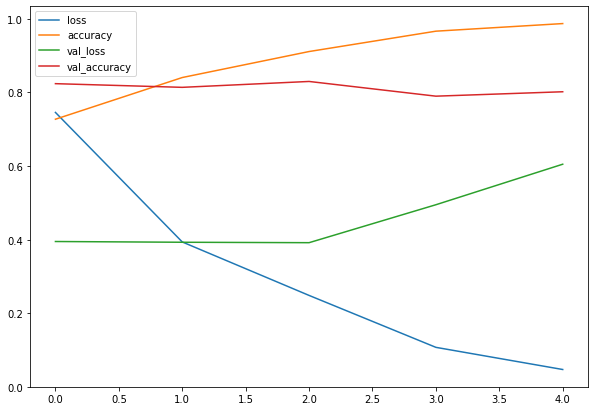

In [38]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [39]:
#Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

When the validation loss is increasing, it is likely that your model is overfitting.

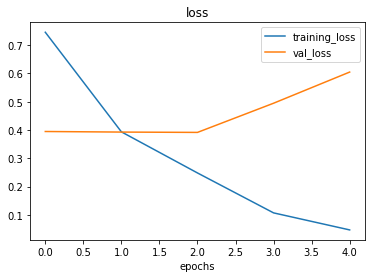

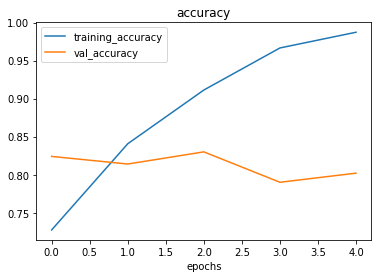

In [40]:
#Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [41]:
#Create the model (this is going to be our new baseline)
model_5 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation="relu"), 
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

In [42]:
#Compile our model
model_5.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

In [43]:
#Fit the model
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 0.5797 - accuracy: 0.7020 - val_loss: 0.4443 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4626 - accuracy: 0.7940 - val_loss: 0.3752 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4150 - accuracy: 0.8240 - val_loss: 0.3683 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4245 - accuracy: 0.8147 - val_loss: 0.3962 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3900 - accuracy: 0.8340 - val_loss: 0.3263 - val_accuracy: 0.8540


In [44]:
#Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

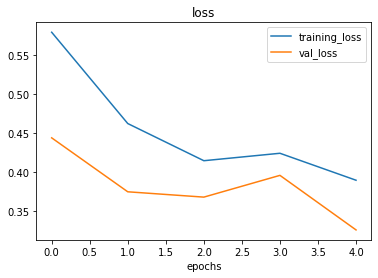

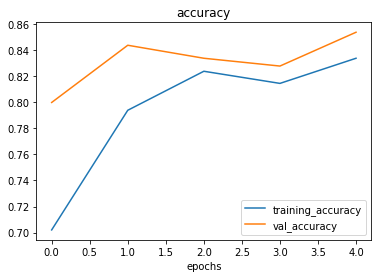

In [45]:
#Plot loss curves
plot_loss_curves(history_5)

### Data augmentation

In [46]:
#Create ImageDataGenerator
train_datagen_augmented = ImageDataGenerator(rescale=1/255., 
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

#Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#Create ImaageDataGenerator without augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

Let´s write some code to visualize data augmentation...

In [47]:
#Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode="binary", shuffle=False)

#Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode="binary", shuffle=False)

#Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


### Let´s visualize some augmented data

In [48]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 18


(-0.5, 223.5, 223.5, -0.5)

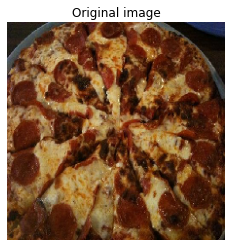

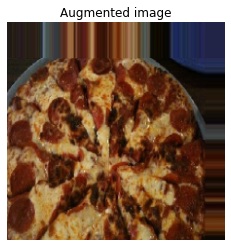

In [49]:
#Show original image and augmented image
random_number = random.randint(0, 31) #batch size are 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now we´ve seen what augmented training data looks like, let´s build a model and see how it learns.

In [50]:
#Create the model
model_6 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

In [51]:
#Compile the model
model_6.compile(loss="binary_crossentropy", metrics="accuracy", optimizer="Adam")

The training last´s longer per epoch, because the images are augmented on the fly (when loaded)

In [52]:
#Fit the model
history_6 = model_6.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 473ms/step - loss: 0.6993 - accuracy: 0.5267 - val_loss: 0.6709 - val_accuracy: 0.6220
Epoch 2/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6863 - accuracy: 0.6233 - val_loss: 0.6486 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 22s 461ms/step - loss: 0.6800 - accuracy: 0.5773 - val_loss: 0.6448 - val_accuracy: 0.6100
Epoch 4/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6818 - accuracy: 0.5893 - val_loss: 0.6264 - val_accuracy: 0.5280
Epoch 5/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6731 - accuracy: 0.5513 - val_loss: 0.6230 - val_accuracy: 0.7460


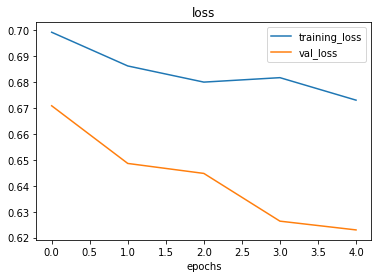

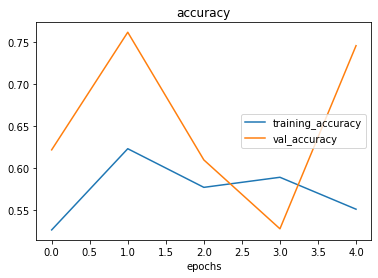

In [53]:
#Check our model training curves
plot_loss_curves(history_6)

Let´s shuffle our augmented training data and train another model (the same as before) on it and see what happens

In [54]:
#Import data, augment and shuffle it from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode="binary", shuffle=True)

Found 1500 images belonging to 2 classes.


In [55]:
#Create the model (same as model_5 and model_6)
model_7 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

In [56]:
model_7.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

In [57]:
history_7 = model_7.fit(train_data_augmented_shuffled, epochs=5, steps_per_epoch=len(train_data_augmented_shuffled), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6510 - accuracy: 0.5967 - val_loss: 0.6276 - val_accuracy: 0.5940
Epoch 2/5
47/47 [==============================] - 22s 465ms/step - loss: 0.5942 - accuracy: 0.6907 - val_loss: 0.5096 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 22s 468ms/step - loss: 0.5451 - accuracy: 0.7280 - val_loss: 0.5125 - val_accuracy: 0.7220
Epoch 4/5
47/47 [==============================] - 22s 463ms/step - loss: 0.4989 - accuracy: 0.7633 - val_loss: 0.4817 - val_accuracy: 0.7620
Epoch 5/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4861 - accuracy: 0.7640 - val_loss: 0.3668 - val_accuracy: 0.8320


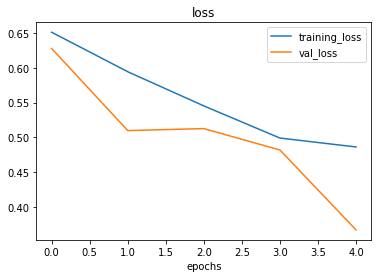

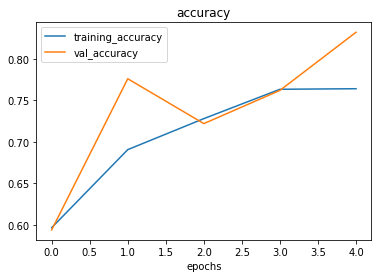

In [58]:
#Plot the loss curves
plot_loss_curves(history_7)

### 7. Repeat until satsfied

Since we´ve already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers
* Increase the number of filters in each convolutional layer (10-32-64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn
* Use transfer learning to leverage what another image model has learned and adjust it for our use case


### Making a prediction with our trained model on our own costum data

In [59]:
#Classes we´re working with
print(class_names)

['pizza' 'steak']


--2021-07-15 17:17:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2021-07-15 17:17:00 (63.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

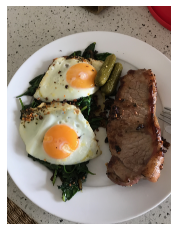

In [60]:
#View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [61]:
steak.shape

(4032, 3024, 3)

In [62]:
#Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turn it into a tensor an reshapes it to (img_shape, img_shape, colour_channes)
  """
  #Read in the image
  img = tf.io.read_file(filename)
  #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale the image (get all values between 0 and 1)
  img = img / 255.
  return img

In [63]:
#Load an preprocess our costum image
steak = load_and_prep_image("03-steak.jpeg")

In [64]:
#expand dims, because we have no batch size [batch_size, height, width, channels]
pred = model_7.predict(tf.expand_dims(steak, axis=0))

Visualize the image and the model predictions

In [65]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [66]:
#We can index the predicted class by rounding the prediction probabilities
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [67]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports and image located at filename, makes a prediction with model and plots the image with the predicted class as the title
  """
  #Import the target image and preprocess it
  img = load_and_prep_image(filename)
  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  #Get the predicted class name
  pred_class = class_names[int(tf.round(pred))]
  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

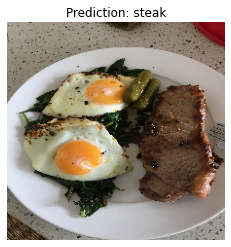

In [68]:
#Test our model on a costum image
pred_and_plot(model_7, "03-steak.jpeg")

#Multiclass image classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evalute the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Become one with the data

In [69]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-07-15 17:17:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.80, 142.250.188.208, 142.250.81.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   247MB/s    in 2.0s    

2021-07-15 17:17:04 (247 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [70]:
import os

#Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 10 directori

In [71]:
#Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [72]:
#Let´s get the class namens
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


image shape: (384, 512, 3)


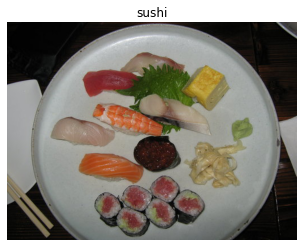

In [73]:
#Visualize a few images
import random
img = view_random_image(train_dir, random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(224,224), 
                                               class_mode="categorical", 
                                               batch_size=32)


test_data = train_datagen.flow_from_directory(test_dir, 
                                               target_size=(224,224), 
                                               class_mode="categorical", 
                                               batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [78]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [79]:
#Build the model
model_8 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(10, activation="softmax")
])

In [80]:
#Compile the model 
model_8.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [82]:
#Fit the model 
history_8 = model_8.fit(train_data, epochs=5, steps_per_epoch=(len(train_data)), validation_data=test_data, validation_steps=(len(test_data)))

Epoch 1/5
235/235 [==============================] - 50s 208ms/step - loss: 2.1391 - accuracy: 0.2217 - val_loss: 1.9796 - val_accuracy: 0.2880
Epoch 2/5
235/235 [==============================] - 45s 190ms/step - loss: 1.8967 - accuracy: 0.3388 - val_loss: 1.9248 - val_accuracy: 0.3248
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 1.6630 - accuracy: 0.4499 - val_loss: 1.8357 - val_accuracy: 0.3524
Epoch 4/5
235/235 [==============================] - 44s 189ms/step - loss: 1.1822 - accuracy: 0.6133 - val_loss: 2.0791 - val_accuracy: 0.3308
Epoch 5/5
235/235 [==============================] - 45s 190ms/step - loss: 0.6036 - accuracy: 0.8056 - val_loss: 2.8143 - val_accuracy: 0.3136


### 5. Evaluate the model

In [87]:
#Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 19s 237ms/step - loss: 2.8143 - accuracy: 0.3136


[2.8143012523651123, 0.31360000371932983]

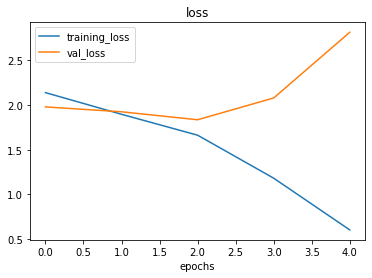

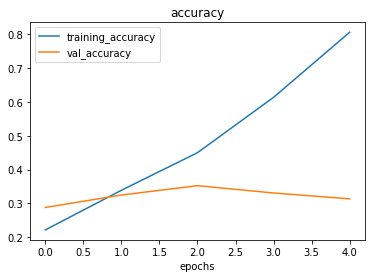

In [86]:
#Plot the training curve
plot_loss_curves(history_8)

It seems out model is overfitting the training set quite badly - in other words, it´s getting great results on the training data but performs quite poorly on the test data.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to it´s performance on the training data, it´s clear our model is learning something...

However, it´s not generalizing well to unseen data (overfitting)

Let´s try and fix overfitting by...

* Get more data
* Simplify the model
  * reduce number of hidden units in the layers
* Use data augmentation
* Use transfer learning

In [88]:
#How about we try and simplify the model first?
#Let´s try to remove 2 convolutional layers
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

In [90]:
model_9 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation="softmax")
])

In [91]:
#compile the model
model_9.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="Adam")

In [92]:
model_9.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

In [93]:
#fit the model
history_9 = model_9.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 71s 300ms/step - loss: 2.2529 - accuracy: 0.1879 - val_loss: 2.0568 - val_accuracy: 0.2460
Epoch 2/5
235/235 [==============================] - 43s 182ms/step - loss: 1.8999 - accuracy: 0.3347 - val_loss: 1.9792 - val_accuracy: 0.2908
Epoch 3/5
235/235 [==============================] - 49s 209ms/step - loss: 1.5913 - accuracy: 0.4648 - val_loss: 1.9314 - val_accuracy: 0.3216
Epoch 4/5
235/235 [==============================] - 45s 192ms/step - loss: 1.2221 - accuracy: 0.6077 - val_loss: 2.1979 - val_accuracy: 0.3092
Epoch 5/5
235/235 [==============================] - 49s 210ms/step - loss: 0.8263 - accuracy: 0.7397 - val_loss: 2.4614 - val_accuracy: 0.2788


In [94]:
#Evaluate the model
model_9.evaluate(test_data)

79/79 [==============================] - 17s 215ms/step - loss: 2.4614 - accuracy: 0.2788


[2.4613964557647705, 0.27880001068115234]

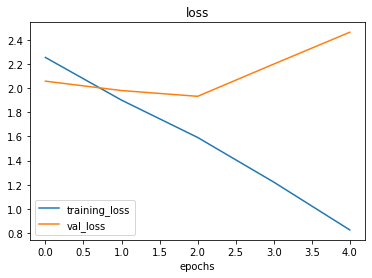

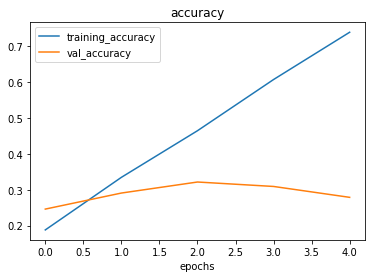

In [95]:
#Plot the training curves
plot_loss_curves(history_9)

Our simplifying model experiment didn´t work - Now we try data augmentation

###Trying to reduce overfitting with data augmentation

Let´s try and improve our model´s result by using augmented training data

Ideally, we want to:
* Reduce overfitting
* Improve validation accuracy

In [97]:
#Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  batch_size=32,
                                                                  target_size=(224,224),
                                                                  class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [98]:
#Let´s create another model but this time we fit the augmented data
model_10 = tf.keras.models.clone_model(model_8)

In [103]:
#compile the model
model_10.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="Adam")

In [104]:
model_10.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

In [105]:
#Fit the model
history_10 = model_10.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 143s 604ms/step - loss: 2.1889 - accuracy: 0.1945 - val_loss: 2.0285 - val_accuracy: 0.2496
Epoch 2/5
235/235 [==============================] - 109s 462ms/step - loss: 2.0756 - accuracy: 0.2575 - val_loss: 1.9460 - val_accuracy: 0.3300
Epoch 3/5
235/235 [==============================] - 110s 468ms/step - loss: 1.9963 - accuracy: 0.3015 - val_loss: 1.9719 - val_accuracy: 0.3448
Epoch 4/5
235/235 [==============================] - 109s 463ms/step - loss: 1.9355 - accuracy: 0.3279 - val_loss: 1.8981 - val_accuracy: 0.3540
Epoch 5/5
235/235 [==============================] - 108s 461ms/step - loss: 1.9018 - accuracy: 0.3375 - val_loss: 1.8604 - val_accuracy: 0.3728


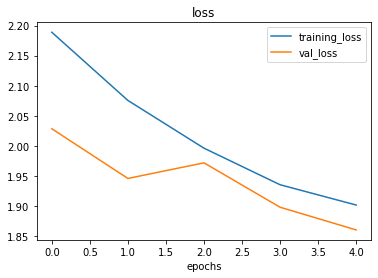

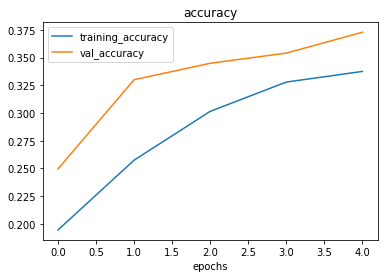

In [106]:
#Plot the training curves
plot_loss_curves(history_10)

In [107]:
#Evaluate the model
model_10.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 1.8604 - accuracy: 0.3728


[1.8604421615600586, 0.37279999256134033]

### 7. Repeat until satisfied

* Running lots of experiments
  * Models architecture (layers, hidden units)
  * Adjust learning rate
  * differnet methods of data augmentation
  * Train longer
  * Try transfer learning

### Making a prediction with our trained model

Let´s use our trained model to make predictions on our own costum images!

In [108]:
#classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [109]:
#Download costum images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2021-07-15 18:18:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.05s   

2021-07-15 18:18:52 (74.3 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2021-07-15 18:18:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [116]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports and image located at filename, makes a prediction with model and plots the image with the predicted class as the title
  """
  #Import the target image and preprocess it
  img = load_and_prep_image(filename)
  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  #Add in logic for multiclass
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else: 
    pred_class = class_names[int(tf.round(pred[0]))]
  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

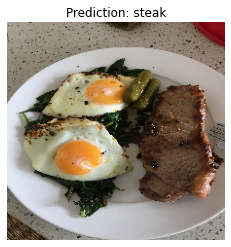

In [118]:
#Make a prediction using model_10
pred_and_plot(model_10, "03-steak.jpeg", class_names)

### Saving and loading our model

In [120]:
#Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [122]:
#Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 16s 198ms/step - loss: 1.8604 - accuracy: 0.3728


[1.8604414463043213, 0.37279999256134033]